In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
S = 25
alpha = 0.25
beta = 1.0
C = 0.15
T = 100
arrival_type = "sigmoid"
departure_type = "sigmoid"

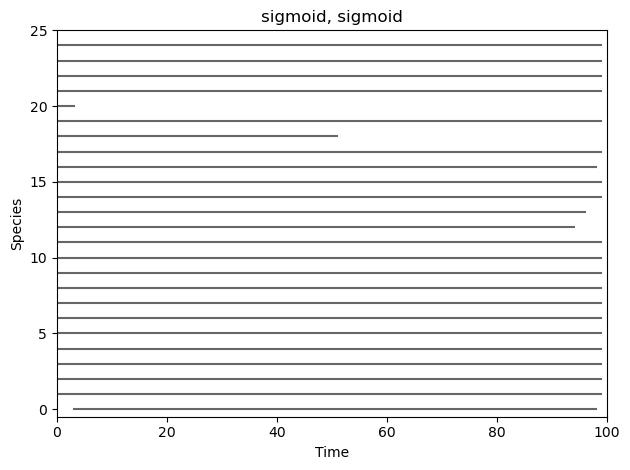

In [3]:
filename = f"S-{S}_alpha-{alpha}_beta-{beta}_C-{C}_T-{T}_{arrival_type}_{departure_type}"
for arrival_type in ["sigmoid"]:
    for departure_type in ["sigmoid"]:
        plt.figure()
        filename = f"S-{S}_alpha-{alpha}_beta-{beta}_C-{C}_T-{T}_{arrival_type}_{departure_type}"
        species_mass = np.load(f"../results/{filename}_species_mass.npy")
        node_activities = np.load(f"../results/{filename}_node_activities.npy")
        for i in np.argsort(species_mass)[::-1]:
            nonz = np.nonzero(node_activities[:, i])[0]
            if nonz.shape[0] > 0:
                plt.plot((nonz.min(), nonz.max()), [i]*2, c="black", alpha=0.6)
            else:
                plt.plot((0, T), [i]*2, c="black", ls="--", alpha=0.1)
        plt.title(arrival_type + ", " + departure_type)
        plt.xlim(0, T)
        plt.ylim(-0.5, 25)
        plt.xlabel("Time")
        plt.ylabel("Species")
        plt.tight_layout()
        plt.savefig(f"../results/plots/{filename}_intervals.png", dpi=150, facecolor=None)

t: 88, G edges: 61, adj shape: (25, 25) sum adj: 61.0, active nodes: [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 61
t: 89, G edges: 88, adj shape: (25, 25) sum adj: 88.0, active nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 88
t: 90, G edges: 88, adj shape: (25, 25) sum adj: 88.0, active nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 88
t: 91, G edges: 88, adj shape: (25, 25) sum adj: 88.0, active nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 88
t: 92, G edges: 88, adj shape: (25, 25) sum adj: 88.0, active nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 88
t: 93, G edges: 88, adj shape: (25, 25) sum adj: 88.0, active nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]
subgraph edges: 88
t: 94, G edges: 82, adj shape: (25, 25) sum adj: 82.0, active nodes: [0, 1, 2, 

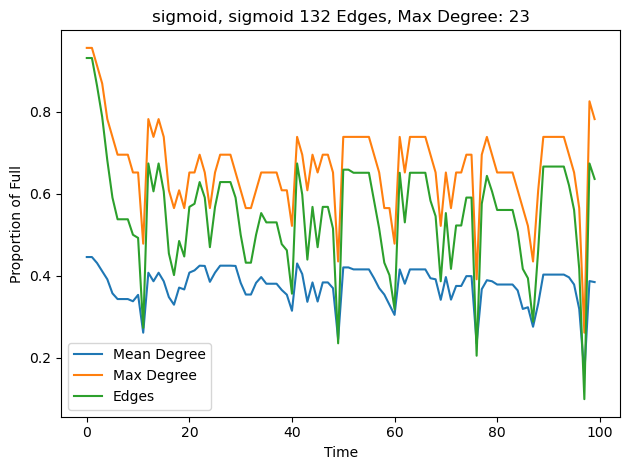

In [4]:
for arrival_type in ["sigmoid"]:
    for departure_type in ["sigmoid"]:
        plt.figure()
        # Read data for this simulation
        filename = f"S-{S}_alpha-{alpha}_beta-{beta}_C-{C}_T-{T}_{arrival_type}_{departure_type}"
        full_adj = np.load(f"../results/{filename}_adj_matrix_full.npy")
        adjacency_matrices = np.load(f"../results/{filename}_temporal_adjacencies.npy")
        node_activities = np.load(f"../results/{filename}_node_activities.npy")

        # Get full graph statistics
        G_full = nx.from_numpy_array(full_adj, create_using=nx.DiGraph)
        maximum_degree = max([G_full.degree(u) for u in G_full])
        total_edges = G_full.number_of_edges()

        # Initialize plot data collection
        mean_degrees = []
        max_degrees = []
        num_edges = []
        
        # Loop over all timesteps
        for t in range(adjacency_matrices.shape[0]):
            adj = adjacency_matrices[t]
            G = nx.from_numpy_array(adj, create_using=nx.DiGraph)
            active_nodes = []
            active_node_degrees = []
            for u in G:
                if node_activities[t, u] > 0:
                    active_nodes.append(u)
                    active_node_degrees.append(G.degree(u))
        
            if len(active_node_degrees) > 0:
                mean_degrees.append(np.mean(active_node_degrees) / maximum_degree)
                max_degrees.append(np.max(active_node_degrees) / maximum_degree)
                num_edges.append(G.number_of_edges() / total_edges)
            else:
                mean_degrees.append(0.0)
                max_degrees.append(0.0)
                num_edges.append(0.0)
            
            if t in list(range(88, 101)):
                print(f"t: {t}, G edges: {G.number_of_edges()}, adj shape: {adj.shape} sum adj: {np.sum(adj)}, active nodes: {active_nodes}")
                print(f"subgraph edges: {G_full.subgraph(active_nodes).number_of_edges()}")
        plt.title(arrival_type + ", " + departure_type + f" {total_edges} Edges, Max Degree: {maximum_degree}")
        plt.plot(list(range(len(mean_degrees))), mean_degrees, label="Mean Degree")
        plt.plot(list(range(len(max_degrees))), max_degrees, label="Max Degree")
        plt.plot(list(range(len(num_edges))), num_edges, label="Edges")
        plt.ylabel("Proportion of Full")
        plt.xlabel("Time")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"../results/plots/{filename}_degrees.png", dpi=150, facecolor=None)

In [5]:
set(G.edges()).intersection(set(G_full.edges())) == G.number_of_edges()

False